In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import hvplot.pandas
import pandas as pd

In [2]:
# Load the data for States adoption rate analysis
df = pd.read_csv(
    Path("../../../../data/processed_data/states_adoption_rates.csv"),
)

# Display the data
print("Shape:", df.shape)
df

Shape: (357, 18)


,year,state,population,electric,phev,hev,biodiesel,ethanol,cng,propane,hydrogen,methanol,gasoline,diesel,unknown,total_vehicles,ev_adoption_rate,gas_adoption_rate
0,2016,Alabama,4863525.0,500,900,29100,0,428300,20100,0,0,0,3777300,126500,53900,4436600,0.000113,0.851395
1,2016,Alaska,741456.0,200,200,5000,0,55700,4900,0,0,0,525900,44800,19400,656100,0.000305,0.801555
2,2016,Arizona,6941072.0,4700,4400,89600,0,427300,17500,0,0,100,4805000,179500,112800,5640900,0.000833,0.851814
3,2016,Arkansas,2989918.0,200,500,19100,0,320500,12600,0,0,0,2097800,96800,22200,2569700,0.000078,0.816360
4,2016,California,39167117.0,141500,116700,966700,0,1322600,80600,0,1300,400,27241000,710400,115500,30696700,0.004610,0.887424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2022,Virginia,8679099.0,56600,21700,198400,40000,496200,300,0,0,0,6643300,153700,31900,7642100,0.007406,0.869303
353,2022,Washington,7784477.0,104100,31400,270200,67500,348300,100,100,0,0,5650700,277400,52700,6802500,0.015303,0.830680
354,2022,West Virginia,1774035.0,1900,1400,18300,15600,127500,100,0,0,0,1267500,45700,10900,1488900,0.001276,0.851300
355,2022,Wisconsin,5890543.0,15700,10000,105200,46500,549700,300,0,0,0,4577400,144500,26900,5476200,0.002867,0.835872


In [3]:
# Convert `ev_adoption_rate` and `gas_adoption_rate` to percentage
df["ev_adoption_rate"] = df["ev_adoption_rate"] * 100
df["gas_adoption_rate"] = df["gas_adoption_rate"] * 100

# Display the data
print("Shape:", df.shape)
df

Shape: (357, 18)


,year,state,population,electric,phev,hev,biodiesel,ethanol,cng,propane,hydrogen,methanol,gasoline,diesel,unknown,total_vehicles,ev_adoption_rate,gas_adoption_rate
0,2016,Alabama,4863525.0,500,900,29100,0,428300,20100,0,0,0,3777300,126500,53900,4436600,0.011270,85.139521
1,2016,Alaska,741456.0,200,200,5000,0,55700,4900,0,0,0,525900,44800,19400,656100,0.030483,80.155464
2,2016,Arizona,6941072.0,4700,4400,89600,0,427300,17500,0,0,100,4805000,179500,112800,5640900,0.083320,85.181443
3,2016,Arkansas,2989918.0,200,500,19100,0,320500,12600,0,0,0,2097800,96800,22200,2569700,0.007783,81.635989
4,2016,California,39167117.0,141500,116700,966700,0,1322600,80600,0,1300,400,27241000,710400,115500,30696700,0.460962,88.742438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2022,Virginia,8679099.0,56600,21700,198400,40000,496200,300,0,0,0,6643300,153700,31900,7642100,0.740634,86.930294
353,2022,Washington,7784477.0,104100,31400,270200,67500,348300,100,100,0,0,5650700,277400,52700,6802500,1.530320,83.067990
354,2022,West Virginia,1774035.0,1900,1400,18300,15600,127500,100,0,0,0,1267500,45700,10900,1488900,0.127611,85.129962
355,2022,Wisconsin,5890543.0,15700,10000,105200,46500,549700,300,0,0,0,4577400,144500,26900,5476200,0.286695,83.587159


# Visualizations: EV Adoption Rate | Gas Adoption Rate

In [4]:
# Create a dictionary of styles to use with axes for titles, labels, and legends

# Set the style for the plot title
title_style = {
    "color": "#2c3e50",  
    "fontsize": 22,       
    "fontweight": "bold",
    "fontfamily": "DejaVu Sans", 
    "ha": "center", 
}

# Set the style for the x and y labels
axis_style = {
    "color": "#34495e",
    "fontsize": 18,
    "fontweight": "semibold",
    "fontfamily": "DejaVu Sans",
    "fontstyle": "italic",
}

# Set the style for legend
legend_style = {
    "fontsize": "small",
    "frameon": True,
    "facecolor": "#ecf0f1",
    "edgecolor": "#bdc3c7",
    "labelspacing": 1,
    "shadow": True,
}

In [5]:
# Create a custom line plot function to use with Seaborn
def custom_line_plot(df, ax, x, y, hue, title, x_label, y_label, leg_title):

    # Create the line plot with our parameters
    ax = sns.lineplot(
        data=df,
        x=x,
        y=y,
        hue=hue,
        marker="o",
        alpha=0.8,
        palette='deep'
    )

    # Set the title and labels using our styles
    ax.set_title(f'{title}', fontdict=title_style)
    ax.set_xlabel(f'{x_label}', fontdict=axis_style)
    ax.set_ylabel(f'{y_label}', fontdict=axis_style)

    # Adjust the legend to fit the plot
    ax.legend(title=f'{leg_title}', bbox_to_anchor=(1, 1), ncol=2, **legend_style)

    return ax

In [6]:
# Create a custom bar plot function to use with Seaborn
def custom_bar_plot(df, ax, x, y, hue, title, xlabel, ylabel, rotation=0):
    
    # Plot the data using a barplot
    sns.barplot(
        data=df, 
        x=x, 
        y=y,
        hue=hue,
        ax=ax, 
        edgecolor='black',
        alpha=0.8
    )

    #  Set the cube helix color palette
    sns.cubehelix_palette(len(df[hue].unique()))

    # Set the title and labels using our styles
    ax.set_title(f'{title}', title_style)
    ax.set_xlabel(f'{xlabel}', axis_style)
    ax.set_ylabel(f'{ylabel}', axis_style)

    # Add grid and adjust layout
    ax.grid(True)

    return ax


In [7]:
# Inspect for anomalies behavior in the data using interactive hvplot
df.hvplot.line(
    x='year',
    y='ev_adoption_rate',
    by='state',
    title = 'EV Adoption Rate Over Time by State',
    xlabel='Year',
    ylabel='EV Adoption Rate (%)',
    legend='top',
    fontscale=1.2,
    width=1500,
    height=650,
)

:NdOverlay   [state]
   :Curve   [year]   (ev_adoption_rate)

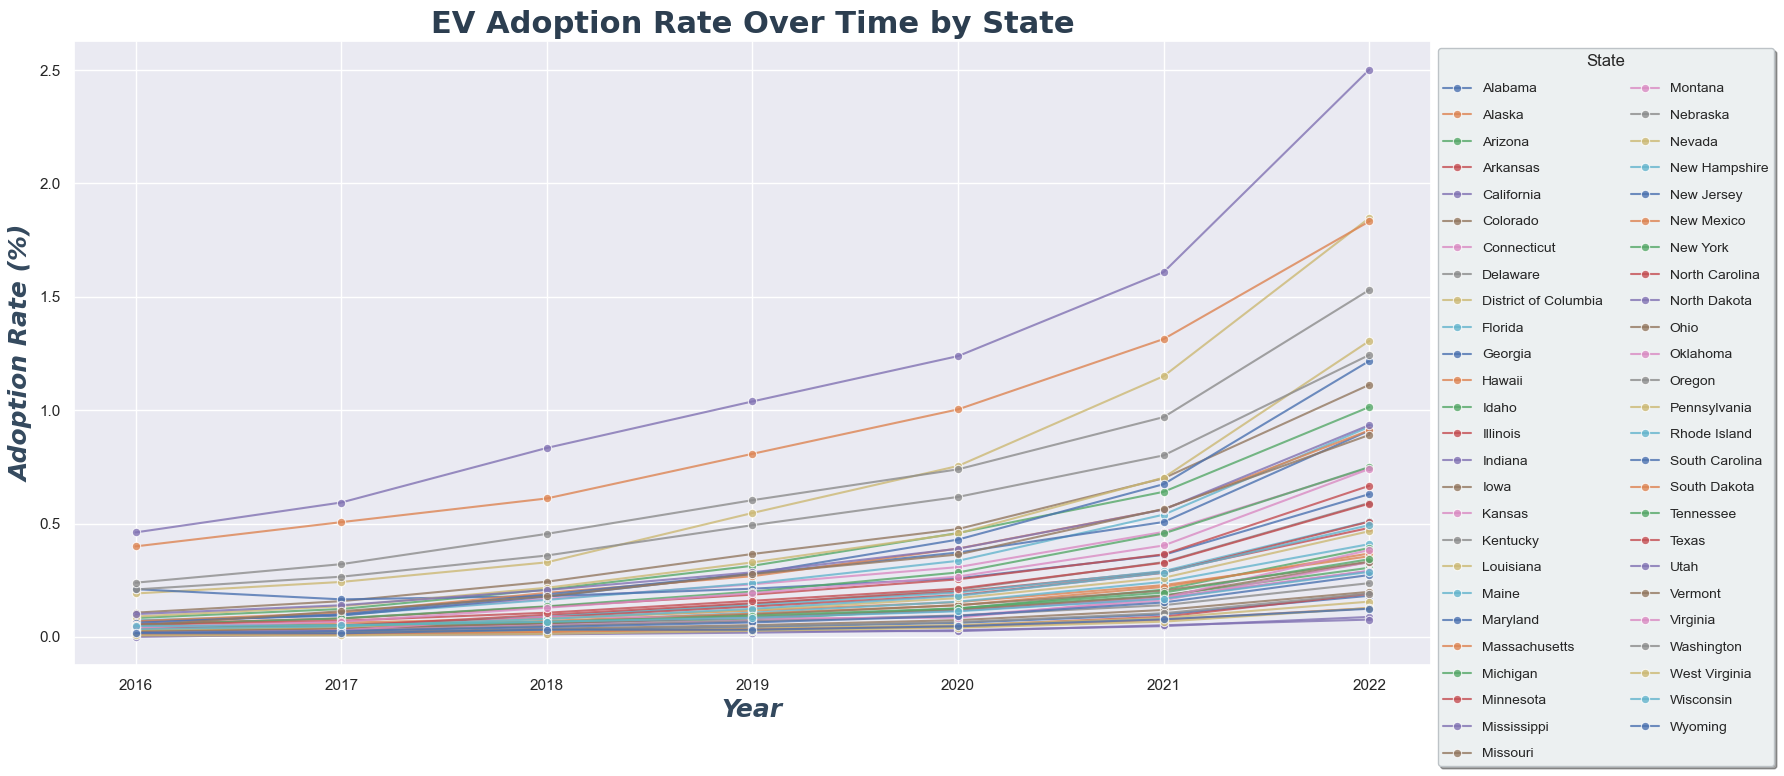

In [8]:
# Plot the EV adoption rate over time by state (2016 - 2022)

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    df,
    ax, 
    x="year", 
    y="ev_adoption_rate", 
    hue="state",
    title="EV Adoption Rate Over Time by State",
    x_label="Year",
    y_label="Adoption Rate (%)",
    leg_title="State"
)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "ev_adoption_rate_over_time_by_state.png"
file_path = Path(f"../../../../reports/figures/adoption_rate_by_state/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

In [9]:
# Filter the data for the year to plot
year_to_plot = 2022
year_df = df[df['year'] == year_to_plot].sort_values(by='ev_adoption_rate', ascending=False)

# Inspect for anomalies behavior in the data using interactive hvplot
year_df.hvplot.bar(
    x='state',
    y='ev_adoption_rate',
    title = f'EV Adoption Rate by State in {year_to_plot}',
    xlabel='State',
    ylabel='EV Adoption Rate (%)',
    rot=45,
    width=1500,
    height=650,
)

:Bars   [state]   (ev_adoption_rate)

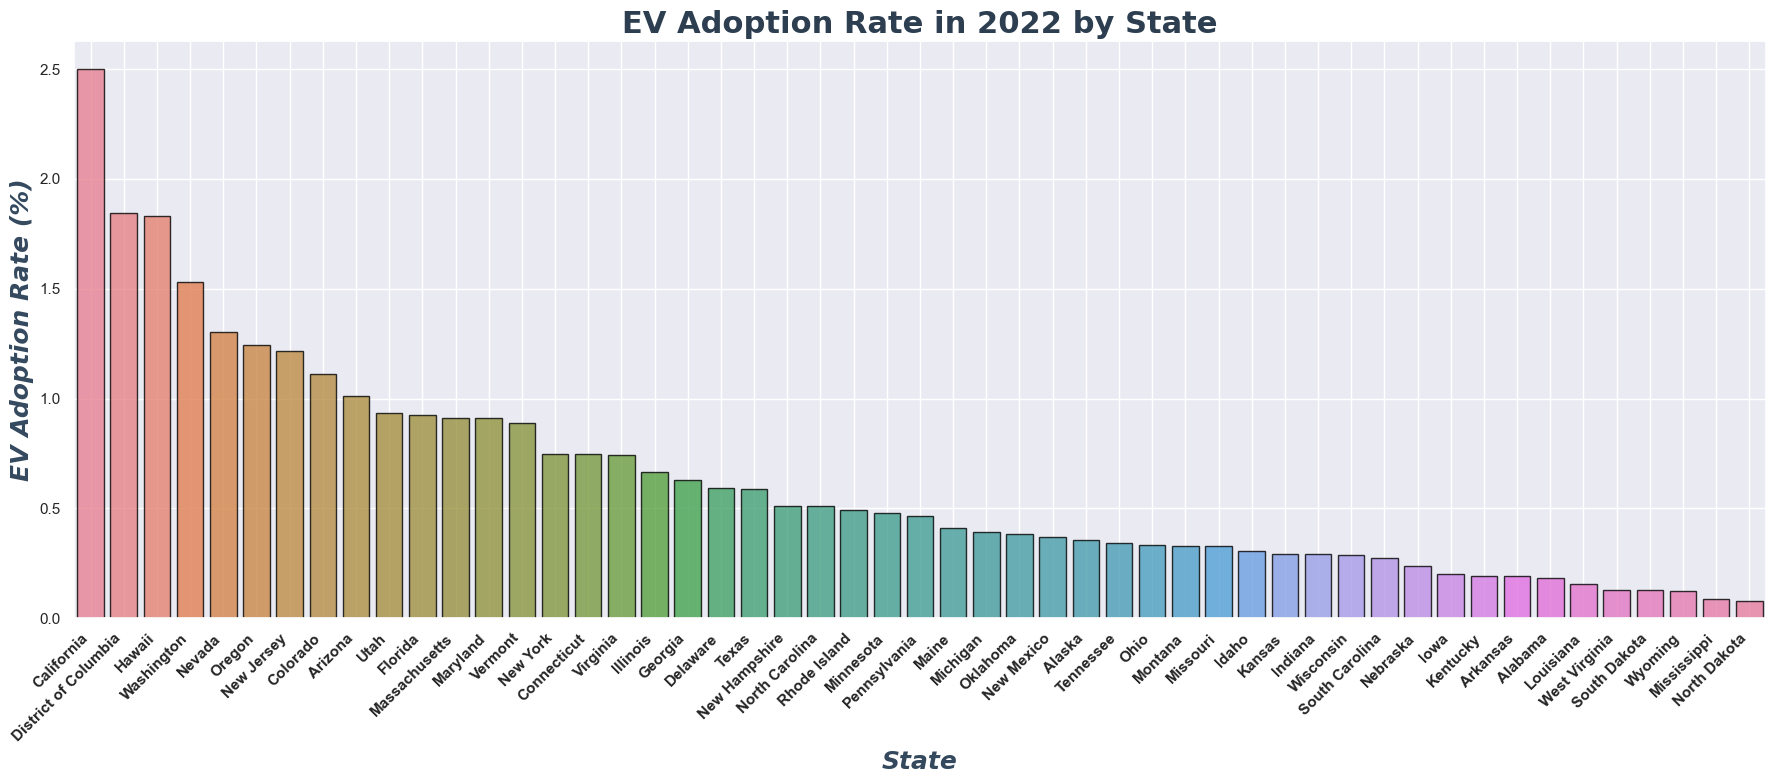

In [10]:
# Plot EV adoption rate for a specific year: 2022

# Filter the data for the year to plot
year_to_plot = 2022
year_df = df[df['year'] == year_to_plot].sort_values(by='ev_adoption_rate', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_bar_plot(
    year_df, 
    ax,
    x='state', 
    y='ev_adoption_rate', 
    hue='state',
    title=f'EV Adoption Rate in {year_to_plot} by State',
    xlabel='State',
    ylabel='EV Adoption Rate (%)'
)

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Adjust the layout
plt.tight_layout()

# Save the plot
file_name = f"ev_adoption_rate_in_{year_to_plot}_by_state.png"
file_path = Path(f"../../../../reports/figures/adoption_rate_by_state/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Show the plot
plt.show()

In [11]:
# Inspect for anomalies behavior in the data using interactive hvplot
df.hvplot.line(
    x='year',
    y='gas_adoption_rate',
    by='state',
    title = 'Gas Vehicle Adoption Rate Over Time by State',
    xlabel='Year',
    ylabel='Gas Vehicle Adoption Rate (%)',
    legend='top',
    fontscale=1.2,
    width=1500,
    height=650,
)

:NdOverlay   [state]
   :Curve   [year]   (gas_adoption_rate)

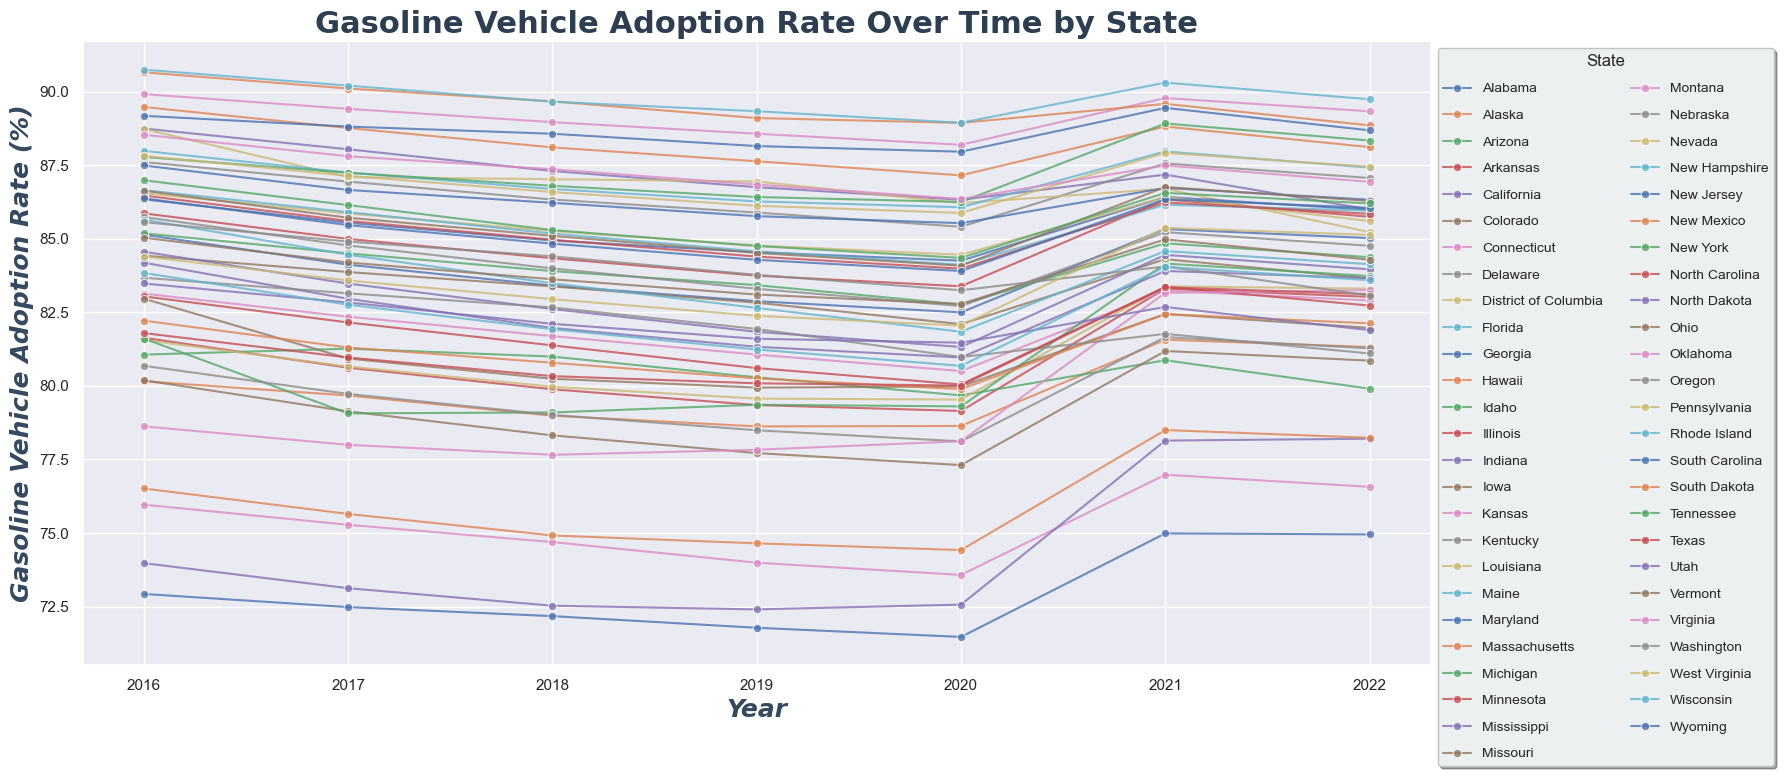

In [12]:
# Plot gasoline vehicle adoption rate over time by state (2016 - 2022)

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    df,
    ax, 
    x="year", 
    y="gas_adoption_rate", 
    hue="state",
    title="Gasoline Vehicle Adoption Rate Over Time by State",
    x_label="Year",
    y_label="Gasoline Vehicle Adoption Rate (%)",
    leg_title="State"
)

# Adjust the layout 
plt.tight_layout()

# Save the plot
file_name = "gasoline_vehicle_adoption_rate_over_time_by_state.png"
file_path = Path(f"../../../../reports/figures/adoption_rate_by_state/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()


In [13]:
# Filter the data for the year we want to plot
year_to_plot = 2022
year_df = df[df['year'] == year_to_plot].sort_values(by='gas_adoption_rate', ascending=False)

# Inspect for anomalies behavior in the data using interactive hvplot
year_df.hvplot.bar(
    x='state',
    y='gas_adoption_rate',
    title = f'Gas Vehicle Adoption Rate in {year_to_plot} by State',
    xlabel='State',
    ylabel='Gas Vehicle Adoption Rate (%)',
    rot=45,
    width=1500,
    height=650,
)

:Bars   [state]   (gas_adoption_rate)

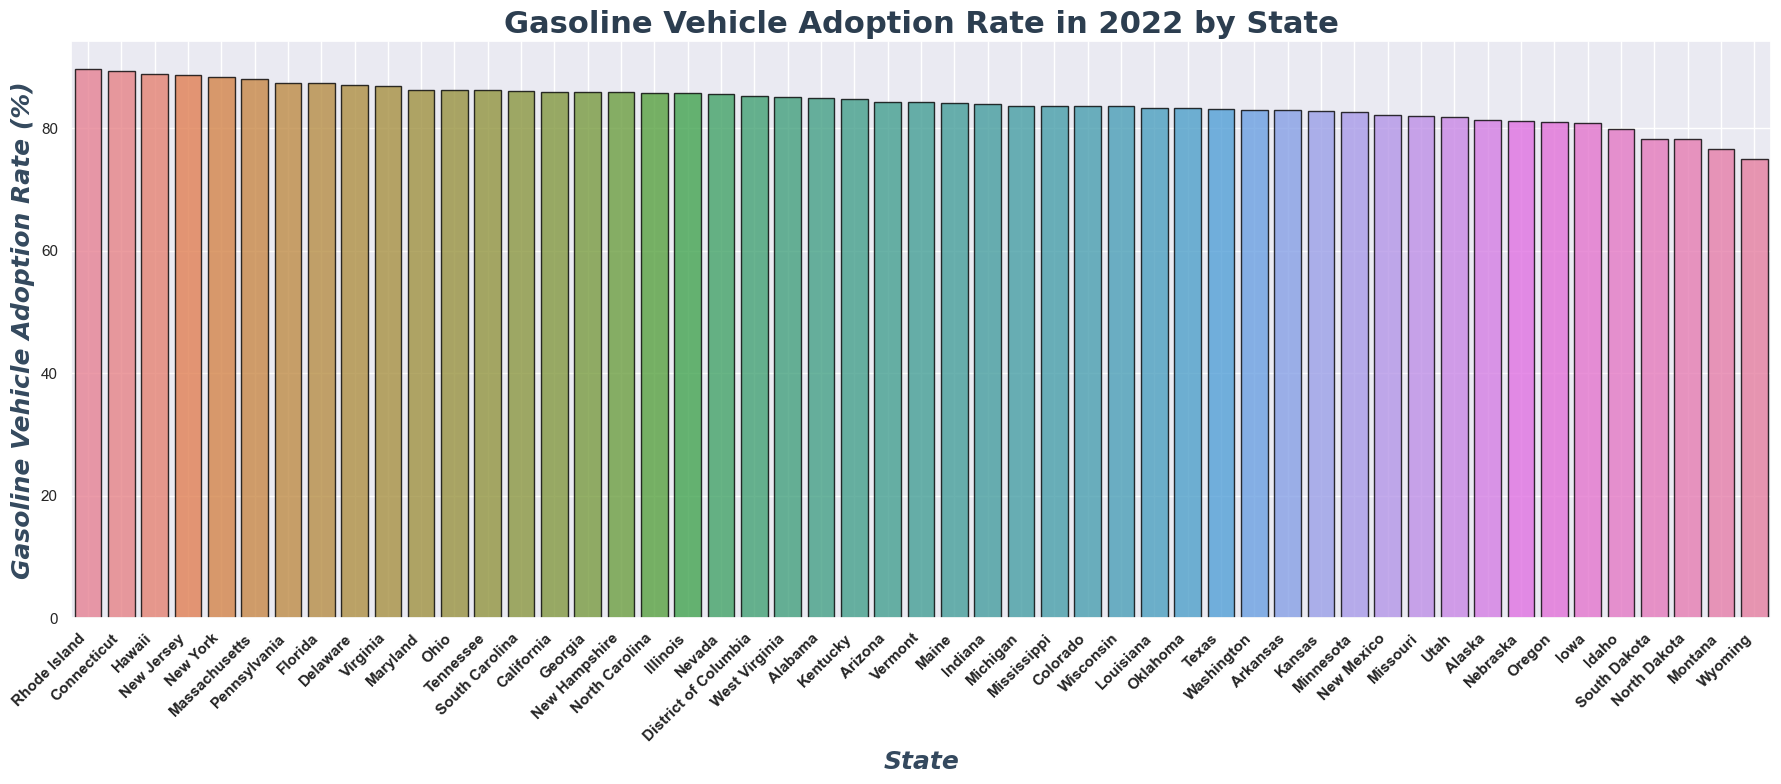

In [14]:
# Plot gasoline vehicle adoption rate for a specific year: 2022

# Filter the data for the year we want to plot
year_to_plot = 2022
year_df = df[df['year'] == year_to_plot].sort_values(by='gas_adoption_rate', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_bar_plot(
    year_df,
    ax,
    x='state',
    y='gas_adoption_rate',
    hue='state',
    title=f'Gasoline Vehicle Adoption Rate in {year_to_plot} by State',
    xlabel='State',
    ylabel='Gasoline Vehicle Adoption Rate (%)'
)

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Adjust the layout
plt.tight_layout()

# Save the plot
file_name = f"gasoline_vehicle_adoption_rate_in_{year_to_plot}_by_state.png"
file_path = Path(f"../../../../reports/figures/adoption_rate_by_state/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()